# Number-theoretic algorithms

## Basic arithmetic

Since we will be dealing with algorithms that implement various arithmetic operations with numbers it will be useful to briefly go over basic arithmetic operations such as addition and multiplication. For the purpose of this section, as opposed to others, we will think of the input size of the problem in terms of the number of bits used to represent the inputs which are numbers. We'll see an example of this for addition.


### Addition

Suppose we have two $n$-bit number $x$ and $y$ and we want to find their sum. Well this can be done in the standard way one would do this in base 10. We just add the least significant bit of $x$ to the least significant bit of $y$, if the sum exceeds 1 then we set the corresponding bit in the sum to 0 and carry the 1 to the next least significant bit. We do this $n$ times, since there are $n$ bits in each number, and we are done so our time complexity is $O(n)$ i.e. linear in the input size. An example of adding the $6$-bit numbers $x=110101_2$ and $y=100011_2$ is shown below.

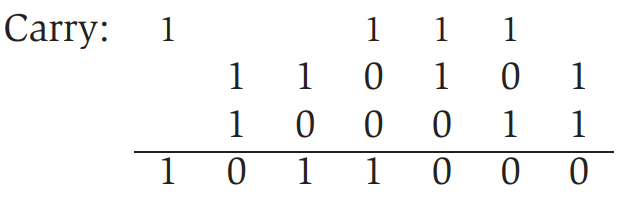

In [2]:
from IPython.display import Image
display(Image("img/bit_add.png", width=600))

### Multiplication & division

The time complexity of multiplying two $n$-bit numbers using the "grade school" method we all learn in school when we are little is $O(n^2)$. Similarly for division it is $O(n^2)$.


```{note}
:class: dropdown
How many bits does one need to represent a number written in base 10 in binary? Well with $n$ bits we can represent $2^n$ numbers
```

## Modular arithmetic

Modular arithmetic refers to arithmetic that is done using the *modulo* operator on the set of integers $\mathbb{Z}$ {cite:p}`dasgupta2008algorithms`. For example we define 


$$
x \bmod N
$$ 

to be equal to the remainder from dividing $x$ by $N$ i.e.

$$
\text{if } x=qN+r \text{ and } 0\leq r < N \text{ so $r$ is not divisible by $N$} \\\text{ then } x \bmod N = r.
$$
Another concept that will be important is congruence, we say $x$ and $y$ are congruent modulo $N$ by writing

$$
x \equiv y\mod N \iff x\bmod N = y\bmod N 
$$

which means $x$ and $y$ have the same remainder when divided by $N$ or equivalently $N$ divides the quantity $x-y$ or also equivalently $x$ and $y$ differ by a multiple of $N$. This essentially means $x$ and $y$ are equal under the operation $\bmod N$. 

 There are some other useful properties of modular arithmetic for example for addition and multiplication we have

$$
x+(y+z) \equiv (x+y)+z \mod N \qquad \text{Associativity} \\
xy \equiv yx\mod N \qquad \qquad \qquad \text{ Commutativity} \\
x(y+z) \equiv (xy+xz) \mod N \qquad \text{Distributivity} \\
$$

the last useful property we need is the substitution rule

$$
\text{If } x\equiv x' \mod N \quad \text{ and }  \quad y\equiv y' \mod N \quad \text{ then: } \\
(x+y)\equiv (x'+y') \mod N \iff (x+y)\bmod N = (x'+y') \bmod N \\
\text{ and } \\ 
xy \equiv x'y' \mod N \iff (xy) \bmod N = (x'y') \bmod N
$$

```{note}
:class: dropdown
Modular addition has other interesting properties as well that we won't make use of here. For example the set of integers $\{0,1,2,3,...,n-1\}$ together with the operation of addition modulo $n$, i.e. you add any two elements in the set then take the modulo $n$ of the result, form a *group* called the group of integers modulo $n$ and is denoted as $\mathbb{Z}_n$ and this group has the interesting property that any cyclic group of order $n$ is isomorphic to it {cite:p}`pinter2010book`.
```

### Modular addition

Modular addition, or addition modulo $N$, is fairly straightforward. For any, $n$-bit, integers $x$ and $y$ we simply compute 

$$
(x+y) \bmod N.
$$

The time complexity of this operation is linear in the input size, i.e. size of the integers $x,y$ and $N$, since we just need to add each bit in $x$ with each bit in $y$. Note that the input size $n$, the number of bits, is on the order of $\lceil\log_2(N+1)\rceil$ since we need $\lceil\log_2(N+1)\rceil$ bits to represent a base 10 number $N$ in binary.

### Modular multiplication

Modular multiplication, or multiplication modulo $N$, is similar to addition modulo $N$.  For any integers $x$ and $y$ we simply compute 

$$
(xy) \bmod N
$$

### Modular exponentiation

Finally modular exponentiation, or exponentiation modulo $N$, for $x$ raised to $y$ is given by

$$
x^y \bmod N.
$$

However there's a problem here. If we were to compute this by first computing $x^y$ directly we would end up with very large numbers. For example if $x$ and $y$ are 20-bit numbers, and since the smallest 20-bit number is $2^{19}$, then the quantity $x^y$ is *at least* $(2^{19})^{2^{19}}=2^{19(524288)}$ which is huge. Note that when I say "smallest 20-bit number" I mean the smallest number that you need 20-bits to represent. So if $x$ and $y$ are $n$-bit numbers then $x^y$ is in general a $(2^{n-1})^{2^{n-1}}$-bit number. This is not optimal since it would require use to use many more bits in our program than may be necessary which in turn worsens the time & space complexity. Is there a clever way to compute $x^y \bmod N$ while keeping the number of bits need on the same order as the number of bits needed to represent $x,y$ and $N$? 

We could instead try this: first suppose we compute $x \bmod N = z_1$. Now lets compute $x^2 \bmod N$. Can we do this without actually computing $x^2$ explicitly? The answer is yes! 
First recall that any integer $x$ that we want to divide by another integer $N$ that is not $0$ we can write $x$ as $x=qN+r$ where $q,r \in \mathbb{Z}$. Also recall that for this integer we have, by definition, $x\bmod N=r$. Now what about $x^2 \bmod N$? Well if we use the same expression for $x$ in terms of $q,N$ and $r$ we get 

$$
\begin{align*}
x^2 &= (qN+r)^2 \\
&= q^2N^2 + 2qrN + r^2 \\
&\text{we can rearrange this to get it into the form $x=qN+r$} \\
&= (q^2N+2qr)N + r^2
\end{align*}
$$

now from this expression it is easy to see that the remainder of $\frac{x^2}{N}$ is $r^2$ and by definition that means 

$$
x^2\bmod N = r^2 = (x \bmod N)^2
$$
and it's fairly straightforward to show this generalizes to $x^n$ for $n\in \mathbb{Z^+}$. Lastly we will need the fact that $(rx)\bmod N = r^2$. This is easy to show since for $x = qN+r$ we have 

$$
\frac{rx}{N} = \frac{rqN+r^2}{N}
$$

and thus the remainder is clearly $r^2$.

Using all of this we have

$$
\begin{align*}
x^2 \equiv (x \bmod N) \mod N 
\iff x^2 \bmod N &= (x\bmod N)^2 \\
&= ((x \bmod N) x) \bmod N \\
&= (rx)\bmod N.
\end{align*}
$$



So to compute $x^y\bmod N$ we can first compute $z_1=x\bmod N$ and then to compute $x^2 \bmod N$ we compute $z_2=(z_1x)\bmod N$. And then to compute $x^3 \bmod N$ we just compute $z_3=(z_2x)\bmod N$ and so on until we have computed $x^y\bmod N$. 
Doing it this way we only ever have to compute the modulo $N$ of numbers that are at most equal to $Nx$ in the case that one of the intermediate modulo operations yields $z_i=N$. 

There is a huge downside with this method however. It is easy to see that we will need to compute exactly $y-1$ multiplications to compute $x^y \bmod N$ with this method which at first seems great; the time complexity is linear in $y$, $O(y)$, so whats the big deal? Well recall that the time complexity of multiplying two $n$-bit numbers is $O(n^2)$ and the complexity of division is also $O(n^2)$ {cite:p}`dasgupta2008algorithms` so each intermediate step has complexity $O(n^2+n^2)=O(n^2)$ since we must multiply $z_i$ with $x$ as well as divide that product by $N$ to compute the modulo $N$. 

***However***, recall that we want to be able to compute $x^y \bmod N$ for $x,y$ and $N$ that are *hundreds* of bits long so $y-1$ is on the order of between $[2^{100}, 2^{999}]$ which is huge. So  in our overall time complexity it makes sense to think of $y$ on the order of $2^n$ so we have a final time complexity of $O(2^nn^2)$ which is exponential in the input size (number of bits needed to represent $x,y$ and $N$). So while the time complexity is in fact linear in $y$ *linear simply isn't good enough for large enough numbers*.

We can do better than this however. Take for example $x^{25}=x^{11001_2}$ we can break this up into products of powers of 2 and one $x$. For this example we have

$$
\begin{align*}
x^{25} &= x^{11001_2} \\ &= x^{10000_2 + 01000_2 + 00001_2}  \\
&= x^{10000_2} \cdot x^{01000_2} \cdot x^{00001_2} \\
&= x^{16} \cdot x^{8} \cdot x^{1}
\end{align*}
$$

Now we have to compute at least 3 multiplications and in general $O(\log_2(y))=O(n)$ multiplications for $n$-bit inputs. This is because for a $n$-bit number we can have at most $n$ 1's in the binary representation and therefore will have to break the number into a product of at most $n$ terms and recall, again, that we need about $n=\log_2(y)$ bits to represent a number $y$ that is in base 10. 

Now if we use repeated squaring to compute one of the terms in the product we only need to compute $x^a \bmod N$ at most $\log_2(y)$ times until we get to $x^y \bmod N$ since we double the exponent at each step (sort of like the opposite of binary search). Lastly during each of the $\log_2(y)$ steps when computing the corresponding power of 2 we will need to perform a division operation to compute the $\bmod$ which has time complexity $O(n^2)$. Thus we have a method with that has complexity $O(\log_2(y)\log_2(y)n^2)=O(n^4)$. 

But this assumes we recompute the intermediate powers of 2 when computing each term, i.e. recomputing $x^2$, $x^4$, $x^8$ when computing $x^{16}$ having just computing $x^{32}$, but we can just compute the largest value of 2 first and then store the intermediate powers of 2 to use later (this is called memoization stay tuned). This would mean we only need to compute each power of 2 ***once*** instead of for each product which brings our time complexity to $O(\log_2(y) + \log_2(y)n^2) = O(\log_2(y)n^2) = O(n^3)$.

## Euclid's greatest common divisor algorithm

Given two integers $x$ and $y$ the largest integer that divides both of them is called their *greatest common divisor* denoted $\gcd(x,y)$. Euclid devised an algorithm to find the $\gcd$ of 2 integers using the fact that, for any positive integers $x$ and $y$ where $x \geq y$, we have 

$$
\gcd(x,y)=\gcd(x\bmod y, y).
$$

The algorithm is given below.

```{prf:algorithm} Euclid $\gcd$
:class: dropdown
:label: gcd 
**procedure** $\text{euclid_gdc}(x,y)$:

**Inputs** Given 2 $n$-bit integers $x$ and $y$ such that $x\geq y \geq 0$

**Output** $\gcd(x,y)$

1. if $y=0$: 
   1. return $x$
2. return $\text{euclid_gdc}(y,x \bmod y)$


```

The time complexity of this algorithm is $O(n^3)$. Why? Well first lets think about how many times we will have to recurse before we reach the base case. 
Well the base case is reached when the input $y=0$ and at each level of recursion our new $y$ is $x \bmod y$. So how much does the $\bmod$ operation reduce a number by? Well if $x\geq y$, which we are assuming is true for our inputs, then $x \bmod y < \frac{x}{2}$. The proof for this is shown in {cite:p}`dasgupta2008algorithms`. So we are reducing the input size, size of $x$ and size of $y$, by more than $\frac{1}{2}$ every 2 recursive calls meaning the we remove at least 1 bit from their length every 2 recursive calls. This means we reach the base case in at most $2n$ recursive calls.


Lastly at each recursive call we perform the $\bmod$ operation which requires we compute a division which has $O(n^2)$ complexity, and thus we have a total time complexity of $O(2nn^2)=O(n^3)$.

## Primality testing

We now turn to the problem of determining if a given integer $x$ is a prime number or not (called primality). A prime number of course being a number that is only divisible by itself and $1$.

### Factoring is hard

According to the Fundamental Theorem of Arithmetic every positive integer larger than 1 can be expressed as (factored) into a product of prime numbers and furthermore this prime factorization is unique up to a permutation of terms in the product. Since prime numbers by definition are their own prime factorization if we can devise an algorithm that computes the prime factorization of any number we will have a way to test if a number is prime. Unfortunately (or maybe fortunately if you like sending messages securely) it is strongly believed that this problem is hard to solve i.e. no algorithm exists that can perform it in time that is polynomial in the size of the input (number of bits in the number to be factored). This hardness of this problem is actually the foundation of modern cryptography and partly why quantum computers have gained much attention with Peter Shor's publication of his algorithm which solves this problem in polynomial time on a *quantum* computer. 

So factoring the number is not an option. What *else* can we do?

### Fermat's little theorem

In the year 1640 the French mathematician Pierre de Fermat stated the following theorem which was later proved by Leonhard Euler.

````{prf:theorem} Fermat’s little theorem
:label: fermat

If $p$ is a prime number then for every $1 \leq a < p$,

$$
\begin{align*}
a^{p-1}\equiv 1 \pmod p \iff a^{p-1}\bmod p &= 1\bmod p \\
&= 1
\end{align*}
$$

````

In essence what this theorem states is that if $p$ is a prime number then for any integer greater than or equal to 1 and less than $p$ we have $a^{p-1}\bmod p=1$. So we're done right? Instead of factoring now we can simply loop through all values of $a$ between 1 and $p$ and check to make sure they are all equal to 1 under $\bmod p$. This means we would test $p-1$ numbers and for each number we have to perform a division which has time complexity $O(n^2)$ given $p$ is a $n$-bit number. So our time complexity is $O((p-1)n^2)=O(pn^2)$ right? Well not quite. While this works fine for small numbers we must remember that we want to be able to do this for very large numbers such as ones with hundreds of bits so the numbers could be as large as $2^n \approx 2^{512}$ which is many orders of magnitude larger than the number of atoms in the universe. This means in the worst case we will have to loop through $2^n$ numbers so our true time complexity in terms of the size of our input $p$ (number of bits) is $O(2^{n}n^2)$ which is exponential in the problem size (number of bits in $p$).   

So now what? Let's devise a simple *randomize* algorithm shown below.

```{prf:algorithm} Primality test
:class: dropdown
:label: primality
**procedure** $\text{is_prime}(p)$:

**Inputs** Given a $n$-bit integer $p$

**Output** True/False

1. Pick a random integer $a$ such that $1 < a < p$ 
2. if $a^{p-1}\bmod N = 1$:
    1. return True
3. else:
    1. return False
```

Now clearly this algorithm will not always be correct because Fermat's little theorem is not an 'if and only if' statement. It *only* tells us that *if* $N$ is prime *then* all integers $1 \leq a< p$ must satisfy $a^{p-1}\bmod p = 1$ but it is entirely possible that $p$ is **not** prime, yet this condition holds for some values of $a$ but not others. For example $341=11\times 31$ is not prime but for $a=2$ we get $2^{341-1}\equiv 1\bmod 341$. In this case if our algorithm randomly selected $a=2$ it would return True when $p$ is in fact not a prime. But how often does this happen for numbers that are not prime? Perhaps the probability is low enough such that this algorithm is still useful? Let's analyze this.

For the case when $p$ is in fact prime our algorithm will clearly return True as dictated by Fermat's little theorem. But what if $p$ is not prime? How many $a$'s are there that would result in $p$ failing our test? Well it turns out that if there is an $a$ that passes the test for composite (non prime) $p$ then *at least* half the possible values of $a$ must also fail the test {cite:p}`dasgupta2008algorithms`. So this means that for an arbitrary $p$ that is not prime our algorithm has a probability $\leq \frac{1}{2}$ of failing i.e. returning True when $p$ is not prime. So this at first seems pretty bad...our algorithm has a $50\%$ chance of failing. However, if we try several different values of $a$ say $k$ values then the probability of the algorithm failing becomes $\leq \frac{1}{2^k}$. This decreases exponentially with $k$ so if we test a large enough number of values for $a$ we can be very confident in the result of our algorithm. For example if we test $k=20$ the probability of failure is reduced to $\frac{1}{2^{20}} \approx 9.53 \times 10^{-7}$ which is quite small. This is an example of a *randomized* algorithm and they are actually used quite often in practice: see for example Monte Carlo methods in statistics.

```{note}
:class: dropdown
Note that there are certain numbers called Carmichael numbers which are composite and pass our test for all $a$ that are relatively prime to $p$ but {cite:p}`dasgupta2008algorithms` show that they are extremely rare and can be avoided with a more clever algorithm.
```

## Cryptography (RSA)

We now arrive at cryptography, specifically the Rivest-Shamir-Adleman (RSA) cryptosystem used to for secure data transmission. It provides very strong security guarantees by relying on and exploiting the presumed hardness of prime factorization of large integers we discussed above. 

## Practice problems